## Faceting

- https://www.youtube.com/watch?v=oUYRqI6wFGw
- https://www.youtube.com/watch?v=3Ls6w8Cd8n4

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

### Example 1.

/Users/phucnt33/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


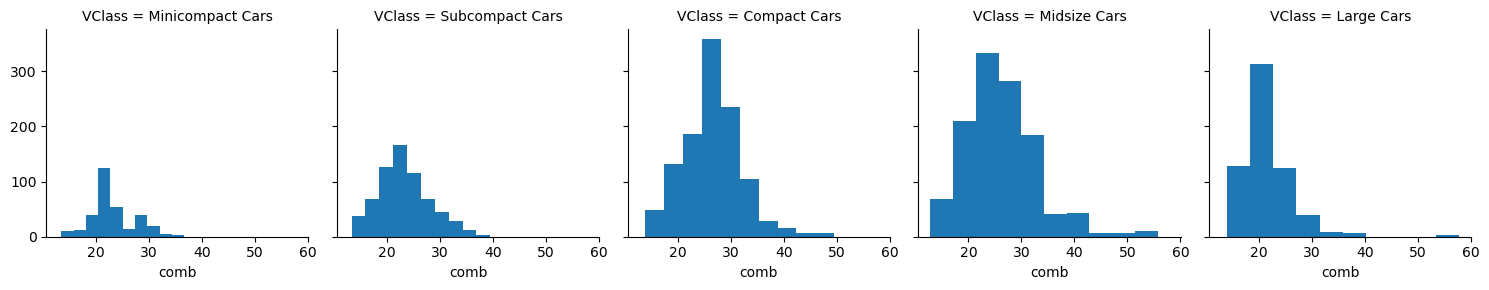

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the CSV file
fuel_econ = pd.read_csv('data/fuel-econ.csv')
fuel_econ.head(10)

# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

In the `map` call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like `x = "comb"`, or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from `hist` to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the `map` function.

### Example 2.

/Users/phucnt33/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


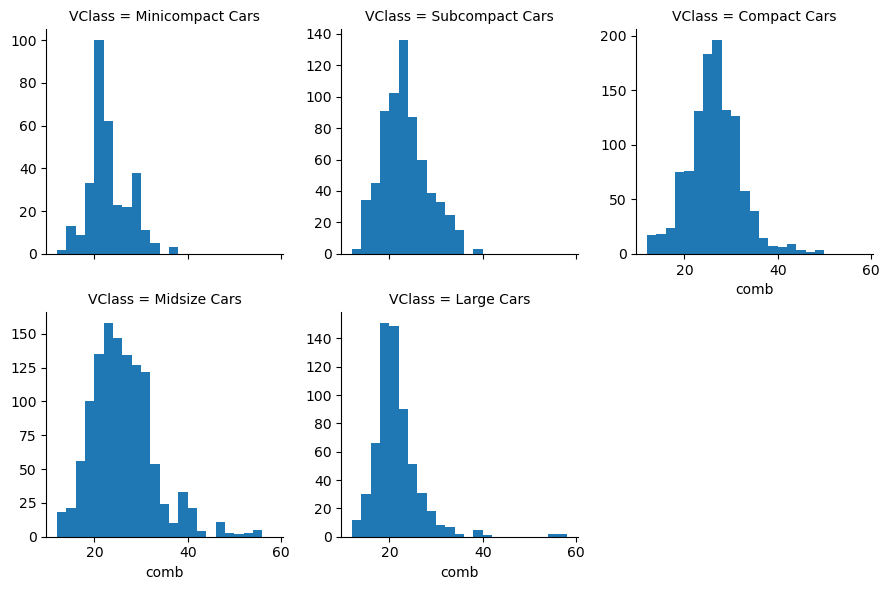

In [11]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

### Additional Variation

If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting col_wrap = 7 means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

### Example 3.

/Users/phucnt33/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


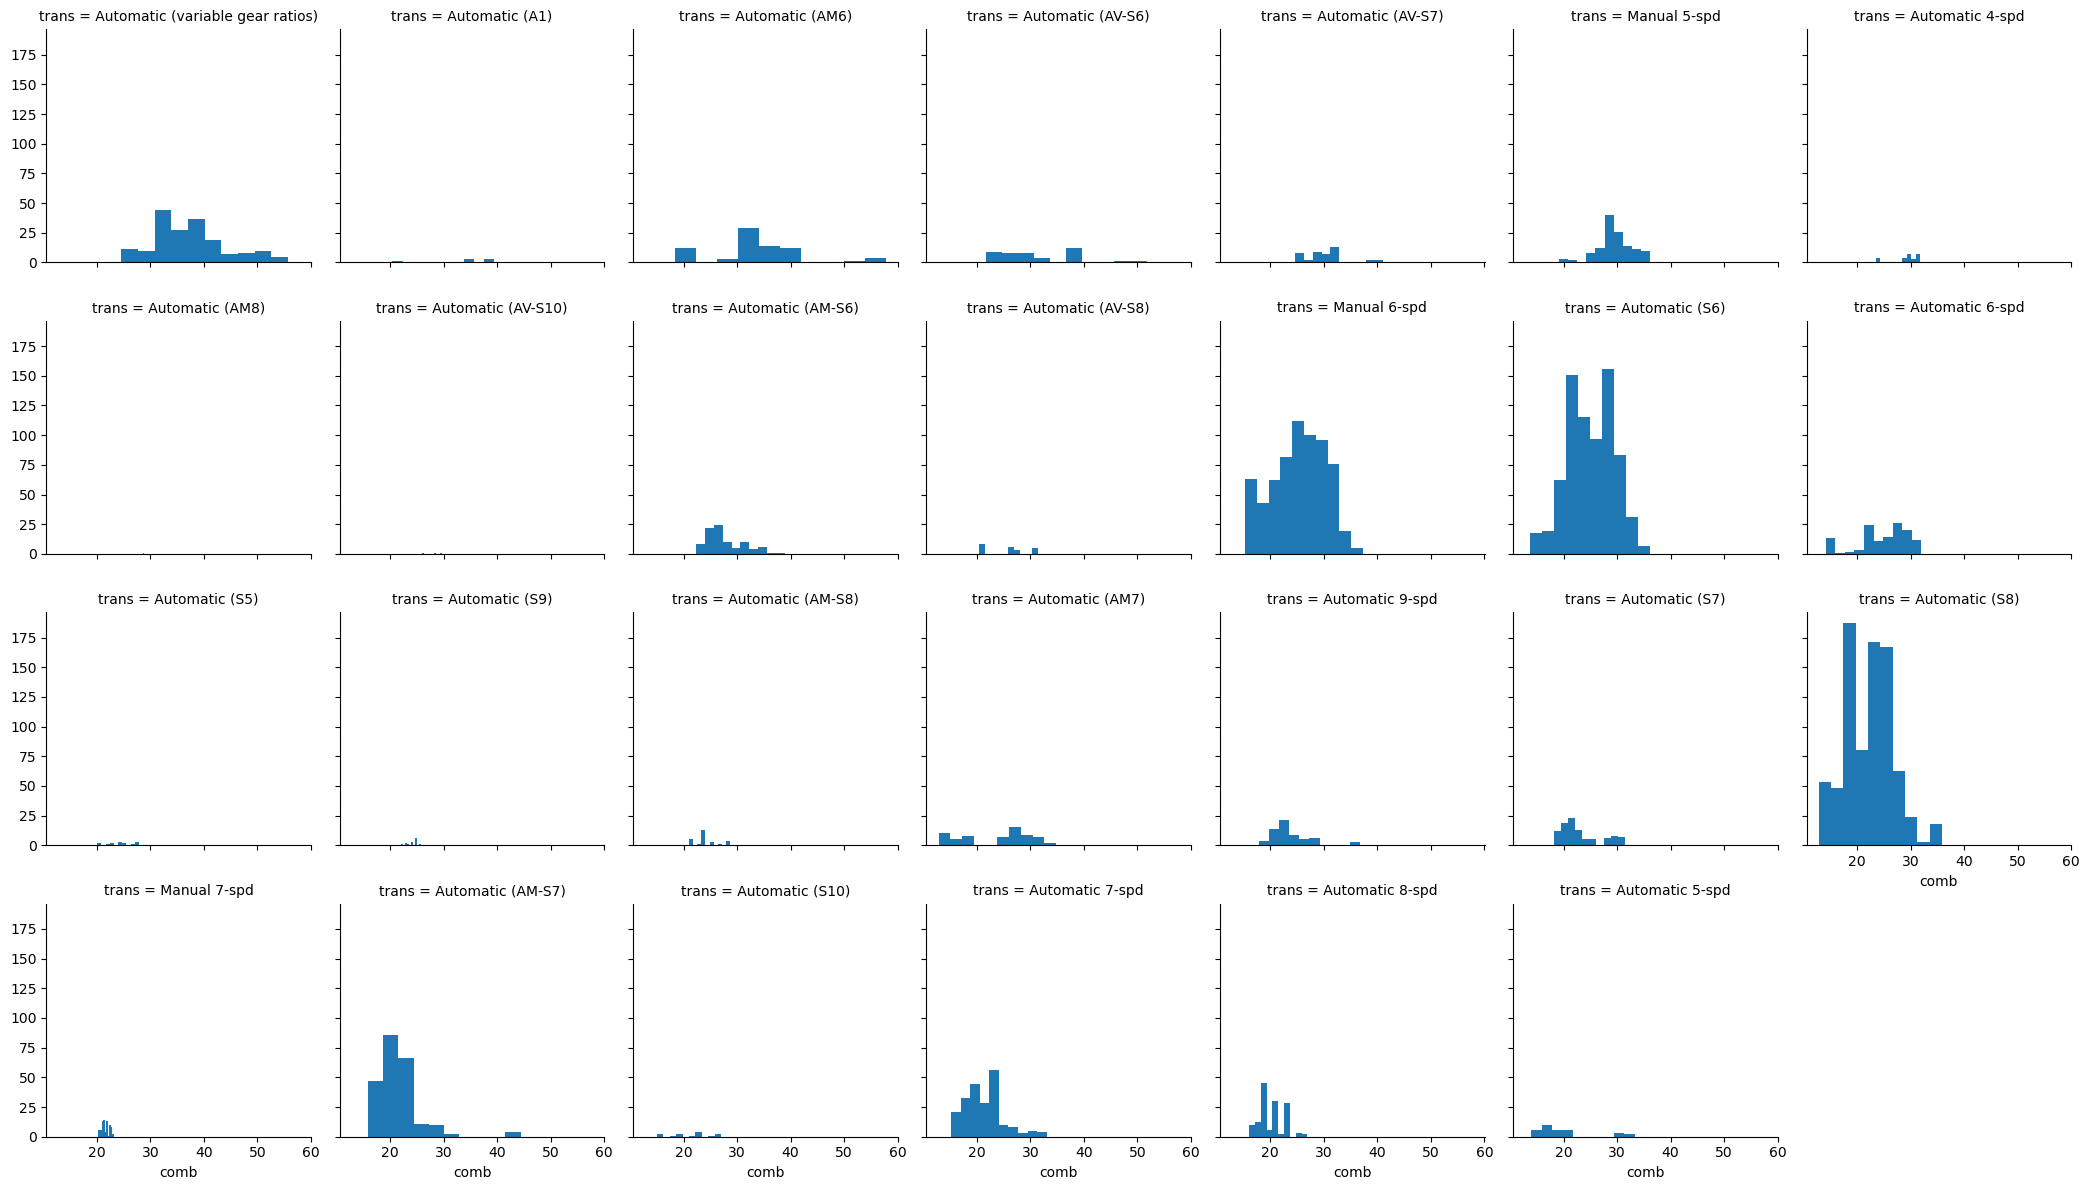

In [12]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

## Adapted Bar Charts

- https://www.youtube.com/watch?v=MXcqplnUB0o
- https://www.youtube.com/watch?v=aJncRqqJUYI

Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's `barplot` function:

### Example 1.

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

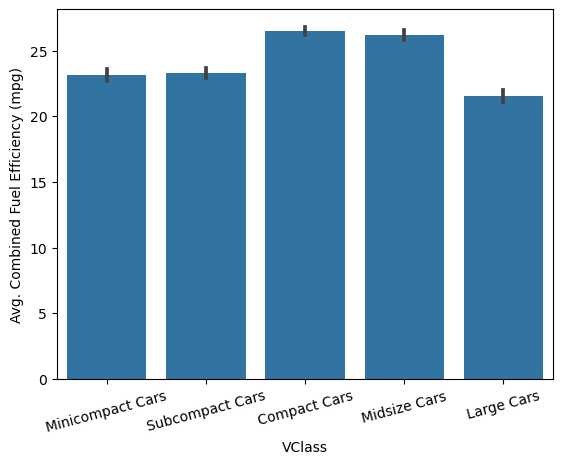

In [14]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

# Different hues are automatically assigned to each category level unless a fixed color is set in the "color" parameter, 
#like in countplot and violinplot.


/var/folders/20/d0x35k0s2jb7rc4msg057cw40000gq/T/ipykernel_2846/4169340485.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')


<Axes: xlabel='VClass', ylabel='comb'>

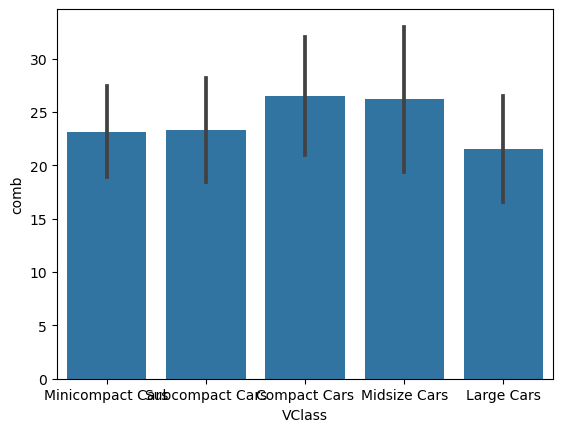

In [15]:
# The bar heights indicate the mean value on the numeric variable, 
# with error bars plotted to show the uncertainty in the mean based on variance and sample size.

# Try these additional arguments
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')

As an alternative, the [pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html) function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

### Example 2.


/var/folders/20/d0x35k0s2jb7rc4msg057cw40000gq/T/ipykernel_2846/849397036.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")


Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

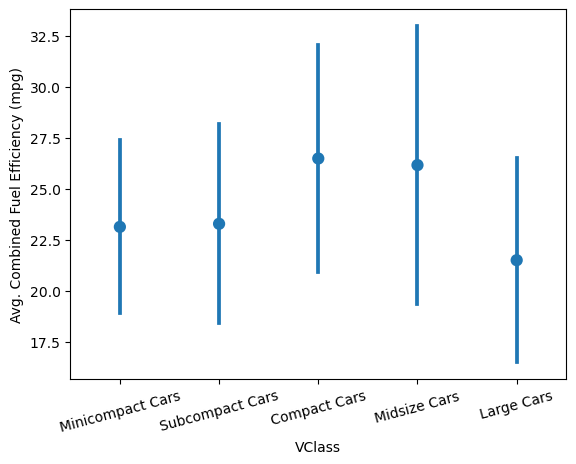

In [16]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

By default, `pointplot` will connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via `linestyles = ""` for nominal data.

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

### Example 3. Bringing a few charts together

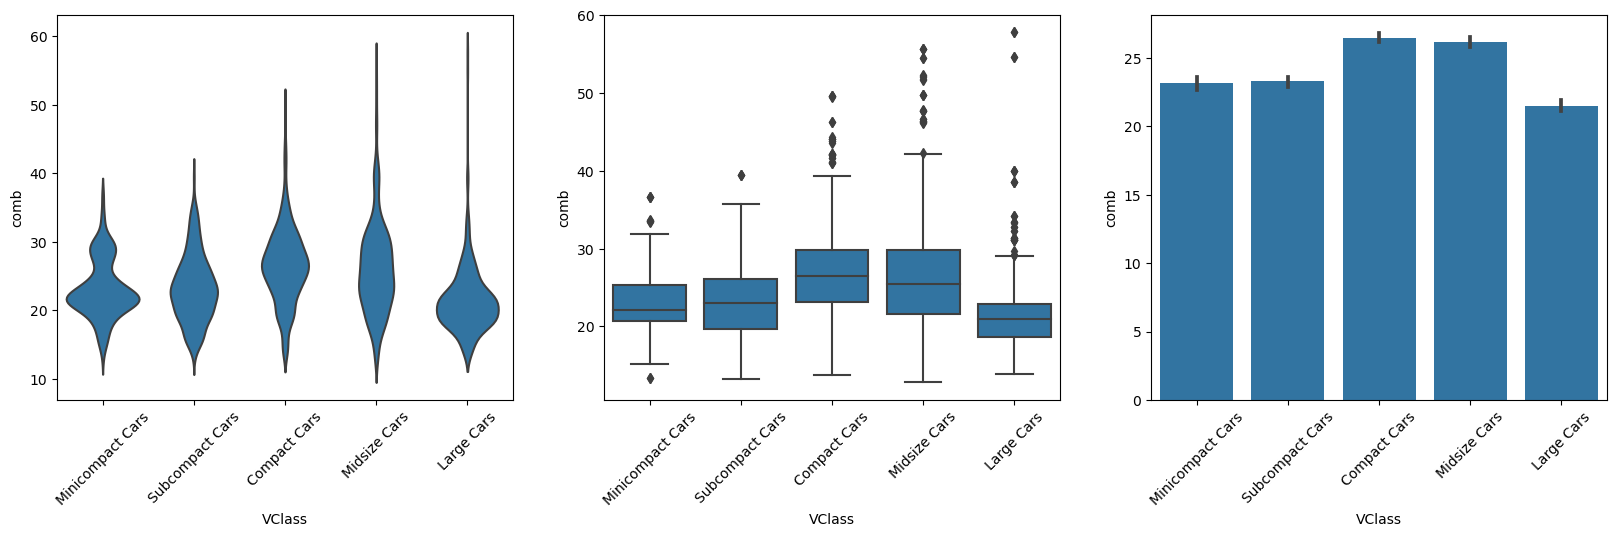

In [17]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

## Line Plots

- https://www.youtube.com/watch?v=kSntEWPuOa0
- https://www.youtube.com/watch?v=Z7NjwA6jbjU

The **line plot** is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's [errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function, performing some processing on the data in order to get it into its necessary form.

Let's see some examples below.

### Example 1.

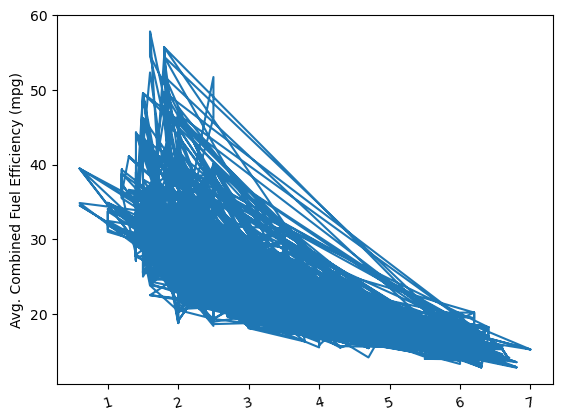

In [18]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

### Example 2.

In [20]:
## Set a number of bins into which the data will be grouped.
## Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

## Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

A series object returned when the `fuel_econ['displ']` column passed to the `pandas.cut()` function

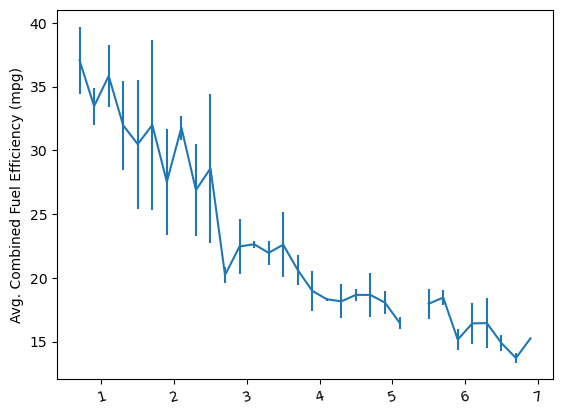

In [21]:
## For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

## Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

Documentation: Refer to the [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function syntax.

## Alternate Variations

Note about the DataFrame object used in the examples below 
The visualizations below are based on a synthetic dataframe object `df`, and show the plots based on its numeric (quantitative) variables, `num_var1`, `num_var2`, and a categorical (qualitative) variable, `cat_var`. **The new dataframe has been chosen to reflect the additional relationship between the selected variables.**

Instead of computing summary statistics on fixed bins, you can also make computations on a rolling window through use of pandas' rolling method. Since the `rolling` window will make computations on sequential rows of the dataframe, we should use `sort_values` to put the x-values in ascending order first.

### Example 3.
```python
## compute statistics in a rolling window
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

## plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')
```

Note that we're also not limited to just one line when plotting. When multiple Matplotlib functions are called one after the other, all of them will be plotted on the same axes. Instead of plotting the mean and error bars, we will plot the three central quartiles, laid on top of the scatterplot.

![image](images/l4-c13-lineplot3.png)

Another bivariate application of line plots is to plot the distribution of a numeric variable for different levels of a categorical variable. This is another alternative to using violin plots, box plots, and faceted histograms. With the line plot, one line is plotted for each category level, like overlapping the histograms on top of one another. This can be accomplished through multiple `errorbar` calls using the methods above, or by performing multiple `hist` calls, setting the "histtype = step" parameter so that the bars are depicted as unfilled lines.

### Example 4.

```python
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
g.add_legend()
```
Note that I'm performing the multiple `hist` calls through the use of FacetGrid, setting the categorical variable on the "hue" parameter rather than the "col" parameter. You'll see more of this parameter of FacetGrid in the next lesson. I've also added an `add_legend` method call so that we can identify which level is associated with each curve.

![image](images/l4-c13-lineplot4.png)

Unfortunately, the "Alpha" curve seems to be pretty lost behind the other three curves since the relatively low number of counts is causing a lot of overlap. Perhaps connecting the centers of the bars with a line, like what was seen in the first `errorbar` example, would be better.

Functions you provide to the `map` method of FacetGrid objects do not need to be built-ins. Below, I've written a function to perform the summarization operations seen above to plot an `errorbar` line for each level of the categorical variable, then fed that function (`freq_poly`) to `map`.

### Example 5.
```python
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()
    
    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)
    
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()
```
`**kwargs` is used to allow additional keyword arguments to be set for the errorbar function.
[Documentation: numpy linspace)](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

![image](images/l4-c13-lineplot5.png)

## Lesson Summary

- https://www.youtube.com/watch?v=5igqM44KEmw

If you'd like to work through the notebooks on your own machine or otherwise outside the classroom, you can find the code in this [GitHub repo](https://github.com/udacity/AIPND).

Additional Examples
Though you have learned a variety of visualizations, you can always find a visualization that fits your requirement here:

- [Sample plots in Matplotlib](https://matplotlib.org/3.3.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py)
- [Sample plots in Seaborn](https://seaborn.pydata.org/examples/index.html)
- [matplotlob.pyplot functions](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
- [seaborn functions](https://seaborn.pydata.org/api.html)



## Glossary

Below is a list of functions from both Matplotlib and Seaborn, that you have learned in this lesson. Observe the tables below carefully, and recall the examples that you have practiced so far. This will help you understand the difference between the utility of Matplotlib and Seaborn packages.

### Univariate Visualization Functions
|Plot type|	matplotlib.pyplot function|	seaborn function|
|----|----|----|
|Bar Chart|	---|	[countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html) [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html)|
|Pie Chart|	[pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)| ---|
|Histogram|	[hist()](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)|	 [distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html)  [displot()](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)  [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)|


### Bivariate Visualization Functions
|Plot type|	matplotlib.pyplot function|	seaborn function|
|---|---|---|
|Scatterplot|	[scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)|	[regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html)|
|Heat Map|	[hist2d()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html)|	[heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)|
|Violin Plot|	---|	[violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html)|
|Box Plot|	---|	[boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html)|
|Clustered Bar Chart|	---|	[countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html) [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)|
|Faceting|	---|	[FacetGrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)|
|Bar Plot|	---|	[barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html)|
|Point Plot|	---|	[pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html)|
|Line Plot|	[errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)|	---|

